In [1]:
# Colin Crowe 5/8/2022

import random
import utils
import numpy as np
import matplotlib.pyplot as plt

Welcome!

This jupyter notebook will serve as an introduction to Chargaff's Second parity rule. I will explain what the problem is, and why it is so mystifying. I reccomend that you read this file first, before diving in to possible explanations.

First, DNA comes in two strands made up of four types of "building blocks" called nucleoties: A, T, C, and G. Whenever an 'A' appears in one strand, you're guaranteed to find a 'T' accross from it in the second strand, and the same goes for 'C' and 'G'.

This is called Chargaff's First Parity Rule, and it has some consequences. Notably for us, here are two:
 - If you were to count up all the occurances of A, T, C, and G in a piece of DNA, you'd end up with an equal number of A's and T's and an equal number of C's and G's. This is because, any time an A in one strand, there must also be a T in the other, so the number of nucleotides must necessarially be the same for both.
 - You can access all the information contained by DNA from just one strand, since, if you have one strand, you know what is encoded in the other.
 
That last one is why online databases of DNA only encode one strand. For example, here's the Homo Sapien BRCA1 gene:

In [2]:
BRCA1 = utils.read_BRCA1()
# print(BRCA1) # <--- uncomment this if you want to see the whole thing!

There's no indication of the second strand, nor does there need to be - we don't have to encode both in our databases. Still it doesn't hurt to mess around a little, so I counted up all the A, T, C, and G in this single strand to see how many there were of each:

In [3]:
a, t, c, g = 0, 0, 0 ,0
for i in BRCA1:
    if i == 'C':
        c += 1
    elif i == 'G':
        g += 1
    elif i == 'A':
        a += 1
    else:
        t += 1
        
        
print('A:', a, "|", 'T:', t)
print('C:', c, "|", 'G:', g)

A: 45530 | T: 47063
C: 33856 | G: 35761


Text(0, 0.5, 'Frequency')

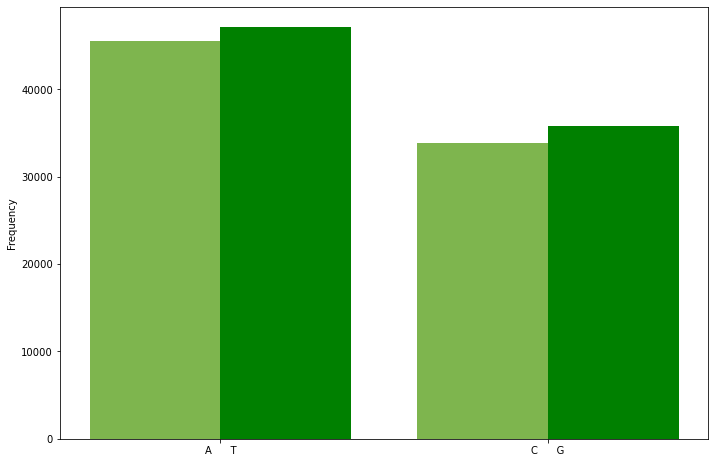

In [4]:
data = [a, t, c, g]
X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.bar(X[0] - 0.2, data[0], color = '#7eb54e', width = 0.4)
ax.bar(X[0] + 0.2, data[1], color = 'g', width = 0.4)
ax.bar(X[1] - 0.2, data[2], color = '#7eb54e', width = 0.4)
ax.bar(X[1] + 0.2, data[3], color = 'g', width = 0.4)
ax.bar(['A      T','C      G'], [0,0])
ax.set_ylabel('Frequency')

...weird!

As you can see, even when looking at single-stranded DNA, we observe an equal number of A's and T's, and an equal number of C's and G's. This is called Chargaff's Second Parity Rule, and, unlike the first, we don't really know why this happens.

But that's not all, because this problem also extends to longer sequences, too. 

If you take a sequence, flip all the nucleotides (so 'A' becomes 'T', 'C' becomes 'G', and vice-versa for both), and reverse the order, then you end up with what's called that sequence's "reverse compliment".

Here's a graph showing the frequencies of all sequences of length 3 ("3-mers") along with their reverse compliments in the BRCA1 genome:

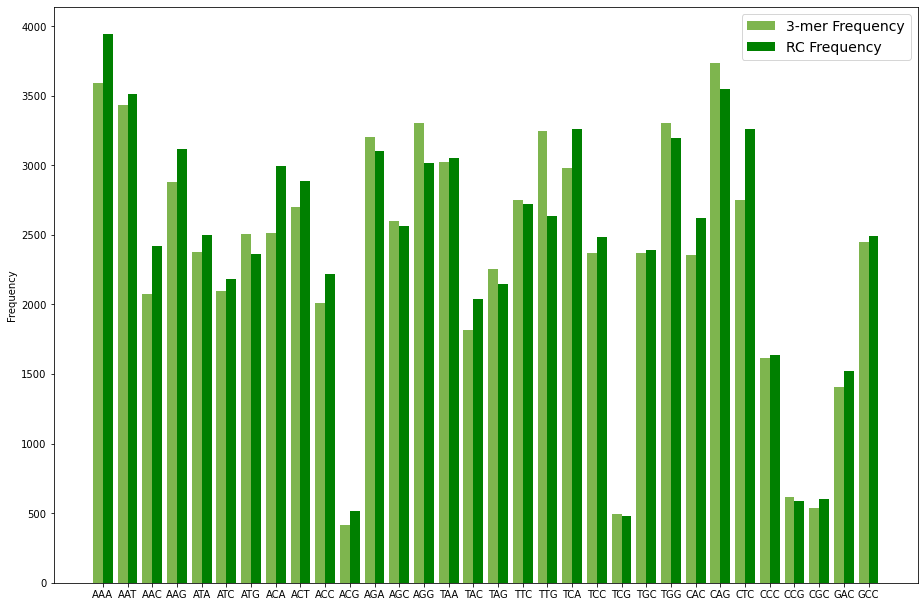

In [8]:
three_mers = utils.get_3mers()
tmer_count = []
rc_count = []
for i in three_mers:
    tmer, rc = utils.get_kmer_rc_count(BRCA1, i)
    tmer_count.append(tmer)
    rc_count.append(rc)
    
empty = []
for i in range(32):
    empty.append(0)

data = [tmer_count, rc_count]
X = np.arange(32)
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(X - 0.2, data[0], color = '#7eb54e', width = 0.4)
ax.bar(X + 0.2, data[1], color = 'g', width = 0.4)
ax.bar(three_mers, empty)
ax.set_ylabel('Frequency')
plt.legend(['3-mer Frequency', 'RC Frequency'],loc=1,prop={'size': 14})

As you can see, it's not perfect, but the trend is undeniable; more often than not, we see the same number of sequences compared to their reverse compliments.

We don't have a working theory to explain wy this happens, but we do have some ideas. The rest of this repo is an exploration into those other ideas. From here, I recommend you check out "random", but any three of "random", "inversion", or "entropy" are understandable at this point.